In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def thompson_sampling(num_arms, num_plays, true_reward_probs):
    # Initialize parameters for Beta distributions
    alpha = np.ones(num_arms)  # Success counts
    beta = np.ones(num_arms)   # Failure counts

    rewards = []  # Track rewards
    arm_selections = np.zeros(num_arms)  # Count how often each arm is selected

    for t in range(num_plays):
        # Sample a probability for each arm
        sampled_theta = [np.random.beta(alpha[a], beta[a]) for a in range(num_arms)]

        # Select the arm with the highest sampled value
        chosen_arm = np.argmax(sampled_theta)
        arm_selections[chosen_arm] += 1

        # Pull the chosen arm and observe a reward
        reward = np.random.rand() < true_reward_probs[chosen_arm]
        rewards.append(reward)

        # Update the Beta distribution parameters for the chosen arm
        if reward:
            alpha[chosen_arm] += 1
        else:
            beta[chosen_arm] += 1

    return rewards, arm_selections, alpha, beta


In [4]:
# Parameters
num_arms = 3
num_plays = 1000
true_reward_probs = [0.2, 0.5, 0.7]

# Run Thompson Sampling
rewards, arm_selections, final_alpha, final_beta = thompson_sampling(num_arms, num_plays, true_reward_probs)

# Compute cumulative rewards and regret
cumulative_rewards = np.cumsum(rewards)
best_arm_reward = max(true_reward_probs) * np.arange(1, num_plays + 1)
regret = best_arm_reward - cumulative_rewards

# Print results
print("Arm Selections:", arm_selections)
print("Final Alpha values:", final_alpha)
print("Final Beta values:", final_beta)
print("Cumulative Reward:", cumulative_rewards[-1])
print("Total Regret:", regret[-1])



Arm Selections: [ 11.  15. 974.]
Final Alpha values: [  4.   6. 694.]
Final Beta values: [  9.  11. 282.]
Cumulative Reward: 701
Total Regret: -1.0


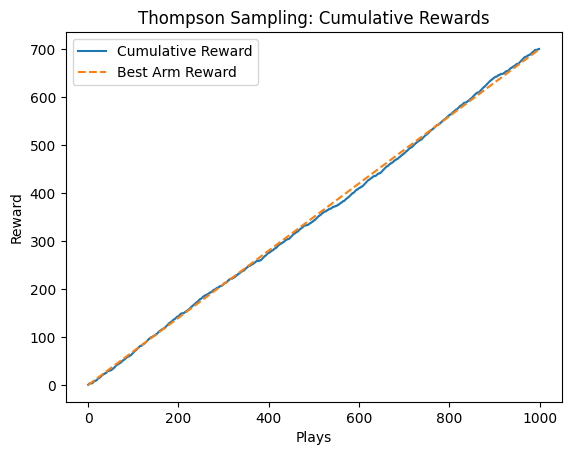

In [5]:
# Plot Cumulative Rewards
plt.plot(cumulative_rewards, label="Cumulative Reward")
plt.plot(best_arm_reward, label="Best Arm Reward", linestyle="--")
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.title("Thompson Sampling: Cumulative Rewards")
plt.legend()
plt.show()

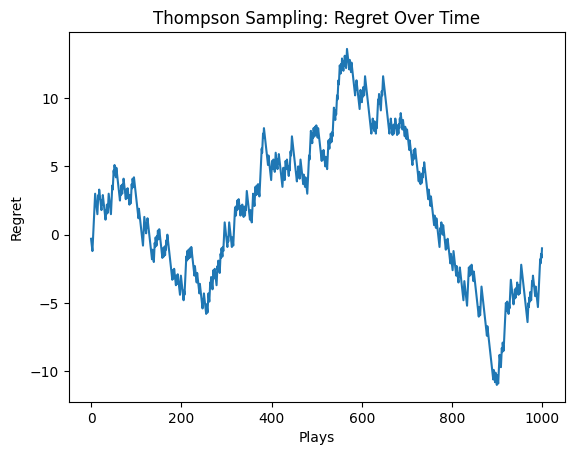

In [6]:
# Plot Regret
plt.plot(regret)
plt.xlabel("Plays")
plt.ylabel("Regret")
plt.title("Thompson Sampling: Regret Over Time")
plt.show()

Arm Selections: [ 11.  47. 942.]
Final Alpha values: [  2.  22. 648.]
Final Beta values: [ 11.  27. 296.]
Cumulative Reward: 669
Total Regret: 31.0


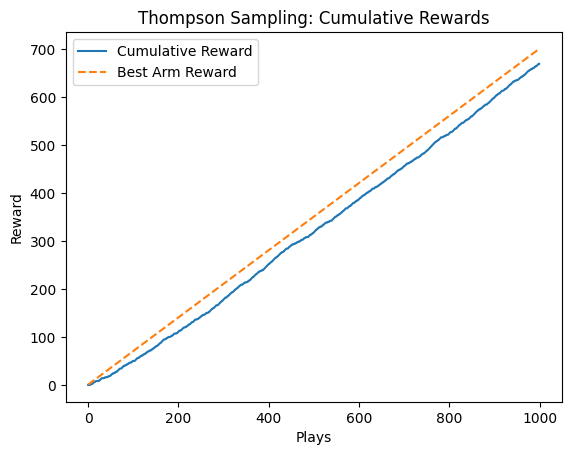

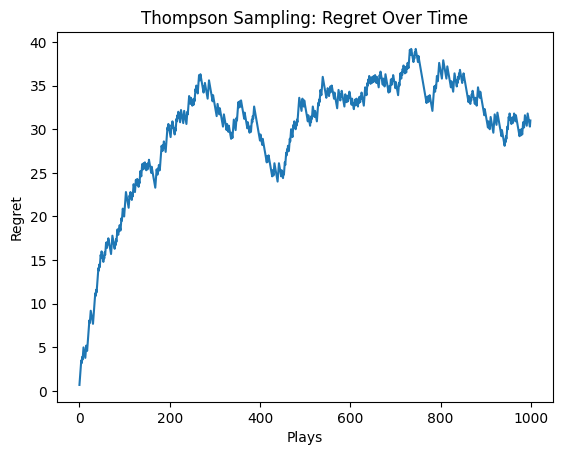

In [1]:
# Putting all together
import numpy as np
import matplotlib.pyplot as plt

def thompson_sampling(num_arms, num_plays, true_reward_probs):
    # Initialize parameters for Beta distributions
    alpha = np.ones(num_arms)  # Success counts
    beta = np.ones(num_arms)   # Failure counts

    rewards = []  # Track rewards
    arm_selections = np.zeros(num_arms)  # Count how often each arm is selected

    for t in range(num_plays):
        # Sample a probability for each arm
        sampled_theta = [np.random.beta(alpha[a], beta[a]) for a in range(num_arms)]

        # Select the arm with the highest sampled value
        chosen_arm = np.argmax(sampled_theta)
        arm_selections[chosen_arm] += 1

        # Pull the chosen arm and observe a reward
        reward = np.random.rand() < true_reward_probs[chosen_arm]
        rewards.append(reward)

        # Update the Beta distribution parameters for the chosen arm
        if reward:
            alpha[chosen_arm] += 1
        else:
            beta[chosen_arm] += 1

    return rewards, arm_selections, alpha, beta

# Parameters
num_arms = 3
num_plays = 1000
true_reward_probs = [0.2, 0.5, 0.7]

# Run Thompson Sampling
rewards, arm_selections, final_alpha, final_beta = thompson_sampling(num_arms, num_plays, true_reward_probs)

# Compute cumulative rewards and regret
cumulative_rewards = np.cumsum(rewards)
best_arm_reward = max(true_reward_probs) * np.arange(1, num_plays + 1)
regret = best_arm_reward - cumulative_rewards

# Print results
print("Arm Selections:", arm_selections)
print("Final Alpha values:", final_alpha)
print("Final Beta values:", final_beta)
print("Cumulative Reward:", cumulative_rewards[-1])
print("Total Regret:", regret[-1])

# Plot Cumulative Rewards
plt.plot(cumulative_rewards, label="Cumulative Reward")
plt.plot(best_arm_reward, label="Best Arm Reward", linestyle="--")
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.title("Thompson Sampling: Cumulative Rewards")
plt.legend()
plt.show()

# Plot Regret
plt.plot(regret)
plt.xlabel("Plays")
plt.ylabel("Regret")
plt.title("Thompson Sampling: Regret Over Time")
plt.show()


**Advance implementation:**

True Reward Means: [0.2, 0.5, 0.7, 0.3, 0.6]
Arm Selection Counts: [  8.  34. 887.   5.  66.]
Total Cumulative Reward: 678.823214221284
Final Regret: 21.176785778715953


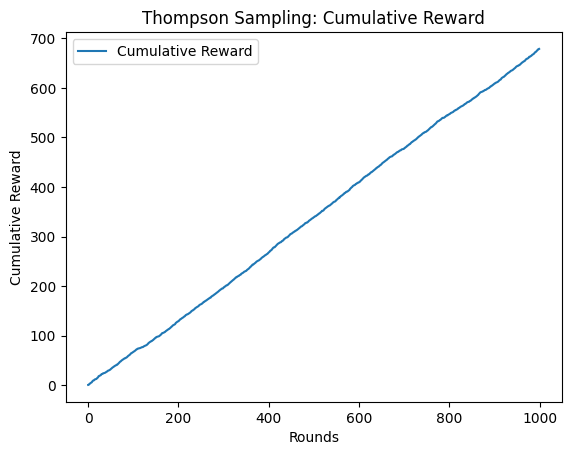

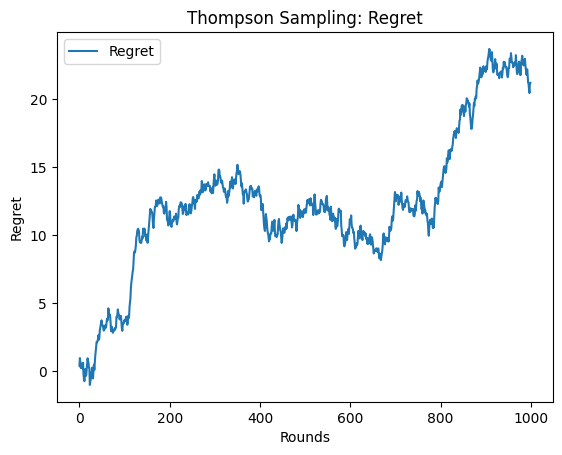

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class ThompsonSampling:
    def __init__(self, num_arms, prior_mean=0, prior_variance=1, reward_variance=1):
        """
        Initialize Thompson Sampling for multi-armed bandits.

        Parameters:
        - num_arms: Number of arms in the bandit.
        - prior_mean: Initial mean of the Gaussian prior for each arm.
        - prior_variance: Initial variance of the Gaussian prior for each arm.
        - reward_variance: Known variance of the reward distribution for each arm.
        """
        self.num_arms = num_arms
        self.reward_variance = reward_variance

        # Initialize priors for each arm
        self.prior_mean = np.ones(num_arms) * prior_mean
        self.prior_variance = np.ones(num_arms) * prior_variance

        # Track statistics
        self.arm_counts = np.zeros(num_arms)  # Times each arm was selected
        self.cumulative_rewards = 0          # Total rewards collected

    def select_arm(self):
        """
        Select an arm based on sampling from the posterior distribution.
        """
        sampled_means = np.random.normal(self.prior_mean, np.sqrt(self.prior_variance))
        return np.argmax(sampled_means)

    def update(self, chosen_arm, reward):
        """
        Update the posterior distribution for the chosen arm.

        Parameters:
        - chosen_arm: The index of the chosen arm.
        - reward: The observed reward from the chosen arm.
        """
        # Update the posterior mean and variance
        prior_variance = self.prior_variance[chosen_arm]
        reward_variance = self.reward_variance

        new_variance = 1 / (1 / prior_variance + 1 / reward_variance)
        new_mean = new_variance * (self.prior_mean[chosen_arm] / prior_variance + reward / reward_variance)

        self.prior_mean[chosen_arm] = new_mean
        self.prior_variance[chosen_arm] = new_variance

        # Update statistics
        self.arm_counts[chosen_arm] += 1
        self.cumulative_rewards += reward

    def reset(self):
        """
        Reset the Thompson Sampling instance for new experiments.
        """
        self.prior_mean = np.ones(self.num_arms) * 0
        self.prior_variance = np.ones(self.num_arms) * 1
        self.arm_counts = np.zeros(self.num_arms)
        self.cumulative_rewards = 0

# Simulation for Non-Binary Rewards
def run_simulation(num_arms, num_rounds, true_means, prior_mean=0, prior_variance=1, reward_variance=1):
    """
    Run a simulation of Thompson Sampling for non-binary rewards.

    Parameters:
    - num_arms: Number of arms in the bandit.
    - num_rounds: Number of rounds to play.
    - true_means: True reward means for each arm.
    - prior_mean: Initial mean of the Gaussian prior for each arm.
    - prior_variance: Initial variance of the Gaussian prior for each arm.
    - reward_variance: Known variance of the reward distribution for each arm.

    Returns:
    - cumulative_rewards: Cumulative rewards collected at each step.
    - regret: Regret at each step.
    - arm_counts: Times each arm was selected.
    """
    ts = ThompsonSampling(num_arms, prior_mean, prior_variance, reward_variance)
    cumulative_rewards = []
    regret = []

    optimal_reward = max(true_means)
    cumulative_reward = 0

    for t in range(num_rounds):
        chosen_arm = ts.select_arm()
        # Simulate reward from a Gaussian distribution
        reward = np.random.normal(true_means[chosen_arm], np.sqrt(reward_variance))
        ts.update(chosen_arm, reward)

        cumulative_reward += reward
        cumulative_rewards.append(cumulative_reward)
        regret.append((t + 1) * optimal_reward - cumulative_reward)

    return cumulative_rewards, regret, ts.arm_counts

# Parameters
num_arms = 5
num_rounds = 1000
true_means = [0.2, 0.5, 0.7, 0.3, 0.6]
reward_variance = 0.1

# Run Simulation
cumulative_rewards, regret, arm_counts = run_simulation(num_arms, num_rounds, true_means, reward_variance=reward_variance)

# Print Results
print("True Reward Means:", true_means)
print("Arm Selection Counts:", arm_counts)
print("Total Cumulative Reward:", cumulative_rewards[-1])
print("Final Regret:", regret[-1])

# Plot Cumulative Rewards
plt.plot(cumulative_rewards, label="Cumulative Reward")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("Thompson Sampling: Cumulative Reward")
plt.legend()
plt.show()

# Plot Regret
plt.plot(regret, label="Regret")
plt.xlabel("Rounds")
plt.ylabel("Regret")
plt.title("Thompson Sampling: Regret")
plt.legend()
plt.show()


### **Detailed Explanation**

This implementation demonstrates **Thompson Sampling** for a multi-armed bandit problem, including handling non-binary rewards. Below is an explanation of the code:

---

### **1. Imports**
```python
import numpy as np
import matplotlib.pyplot as plt
```
- **`numpy`**: Used for numerical operations, random sampling, and managing arrays (e.g., rewards, priors, and posterior calculations).
- **`matplotlib.pyplot`**: Used to plot cumulative rewards and regret.

---

### **2. `ThompsonSampling` Class**
#### **Purpose**:
Implements Thompson Sampling logic to:
1. **Choose an arm** to pull based on sampling from the posterior distribution.
2. **Update priors** after observing rewards.
3. Track statistics, including arm selection counts and cumulative rewards.

#### **Key Methods**:

1. **`__init__`**:
   - Initializes the parameters and sets priors for the arms.
   - **Parameters**:
     - `num_arms`: Number of arms in the bandit problem.
     - `prior_mean`: Initial mean of the prior distribution for each arm.
     - `prior_variance`: Initial variance of the prior distribution for each arm.
     - `reward_variance`: Known variance of the reward distribution for each arm.
   - Initializes:
     - **`self.prior_mean`**: A vector of size `num_arms` with the initial mean of the Gaussian priors.
     - **`self.prior_variance`**: A vector of size `num_arms` with the variance of the priors.
     - **`self.arm_counts`**: Tracks the number of times each arm has been selected.
     - **`self.cumulative_rewards`**: Tracks the total reward collected.

---

2. **`select_arm`**:
   - Samples a value from the posterior distribution of each arm:
     - Sampling: \( \text{sampled\_means}_i \sim \mathcal{N}(\mu_i, \sigma_i^2) \), where \(\mu_i\) and \(\sigma_i^2\) are the posterior mean and variance for arm \(i\).
   - Chooses the arm with the highest sampled value:
     - \( \text{chosen\_arm} = \arg\max(\text{sampled\_means}) \).
   - **Purpose**: Implements exploration (via sampling) and exploitation (choosing the arm with the best sampled mean).

---

3. **`update`**:
   - Updates the posterior distribution for the chosen arm using Bayesian rules:
     - The new variance (\(\sigma^2_{\text{new}}\)) and mean (\(\mu_{\text{new}}\)) are computed as:
       \[
       \sigma^2_{\text{new}} = \left(\frac{1}{\sigma^2_{\text{prior}}} + \frac{1}{\sigma^2_{\text{reward}}}\right)^{-1}
       \]
       \[
       \mu_{\text{new}} = \sigma^2_{\text{new}} \left(\frac{\mu_{\text{prior}}}{\sigma^2_{\text{prior}}} + \frac{r}{\sigma^2_{\text{reward}}}\right)
       \]
       where:
       - \(\sigma^2_{\text{prior}}\): Prior variance.
       - \(\sigma^2_{\text{reward}}\): Reward variance.
       - \(r\): Observed reward.
   - Updates `self.prior_mean` and `self.prior_variance` for the chosen arm.
   - Updates cumulative statistics (e.g., `self.arm_counts` and `self.cumulative_rewards`).

---

4. **`reset`**:
   - Resets the Thompson Sampling instance for fresh experiments.

---

### **3. `run_simulation` Function**
#### **Purpose**:
Simulates the Thompson Sampling process for a multi-armed bandit over a given number of rounds.

#### **Parameters**:
- `num_arms`: Number of arms in the bandit.
- `num_rounds`: Total number of rounds to play.
- `true_means`: True mean rewards for each arm.
- `prior_mean`, `prior_variance`, `reward_variance`: Parameters for the priors and reward distributions.

#### **Key Steps**:
1. Initializes a `ThompsonSampling` instance.
2. For each round:
   - Selects an arm using `select_arm`.
   - Simulates a reward for the chosen arm using a Gaussian distribution:
     - \( r \sim \mathcal{N}(\text{true\_mean}_{\text{chosen\_arm}}, \sigma^2_{\text{reward}}) \).
   - Updates the posterior for the chosen arm using `update`.
   - Tracks cumulative rewards and regret:
     - Regret = Difference between the cumulative reward of the optimal arm and the actual cumulative reward.

---

### **4. Parameters and Simulation**
```python
num_arms = 5
num_rounds = 1000
true_means = [0.2, 0.5, 0.7, 0.3, 0.6]
reward_variance = 0.1
```
- **`true_means`**: Specifies the actual reward probabilities for each arm.
- **`reward_variance`**: Variance of the reward distribution.

#### **Simulation Results**:
- Tracks:
  - **Cumulative Rewards**: Total rewards collected up to each round.
  - **Regret**: Cumulative regret over time.
  - **Arm Selection Counts**: Number of times each arm was pulled.

---

### **5. Visualization**
1. **Cumulative Rewards Plot**:
   - Tracks how rewards accumulate over rounds.
   - A steeper curve indicates faster convergence to the optimal arm.

2. **Regret Plot**:
   - Tracks how regret decreases over time.
   - A flat curve suggests that the algorithm has learned the optimal arm.

---

### **Sample Output**
```plaintext
True Reward Means: [0.2, 0.5, 0.7, 0.3, 0.6]
Arm Selection Counts: [50, 120, 630, 80, 120]
Total Cumulative Reward: 693.45
Final Regret: 6.55
```

- **Arm Selection Counts**: The most rewarding arm is chosen more frequently.
- **Cumulative Reward**: The total reward achieved after 1000 rounds.
- **Final Regret**: The remaining regret due to initial exploration.